In [0]:
from google.colab import drive
drive.mount('/content/drive')
!ls
!pwd
!cd /content/drive
print('done')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive  sample_data
/content
done


In [0]:
!ls "/content/drive/My Drive/SML" #/Attribute/small_data_attri"
!cd "/content/drive/My Drive/SML"
!pwd
# !cd "/content/drive/My Drive/CF/small_data"

jigsaw-toxic-comment-classification-challenge.zip  test_labels.csv
preprocessed_data.csv				   train1.txt
preprocessed_testdata.csv			   train.csv
sample_submission.csv				   train.txt
test.csv
/content


In [0]:
import pandas as pandas 
import numpy as numpy
import seaborn as sb
import matplotlib.pyplot as plt

In [0]:
data = pandas.read_csv('/content/drive/My Drive/SML/preprocessed_data.csv', index_col=0)#, sep = '\t')
data.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,aww matches background colour seemingly stuck ...,0,0,0,0,0,0
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0
3,make real suggestions improvement wondered sec...,0,0,0,0,0,0
4,sir hero chance remember page,0,0,0,0,0,0


In [0]:
testdata = pandas.read_csv('/content/drive/My Drive/SML/preprocessed_testdata.csv', index_col=0)#, sep = '\t')
testdata.head()

,comment_text
0,yo bitch ja rule succesful ever whats hating s...
1,rfc title fine imo
2,sources zawe ashton lapland
3,look back source information updated correct f...
4,anonymously edit articles


In [0]:
# # data1 = '\n'.join(data['comment_text'])
# print(type(dd[2406]))
# print(dd[2407])
# print(type(dd[2407]))
# print(str(dd[2407]))
# ch = str(dd[2407])
# print(type(ch))
# # print(dd[2408])
# # print(data)
# # print(data1)
# dd[2407] = str(dd[2407])


In [0]:
# for d in dd:
#     print(type(d))

In [0]:
# data['comment_text']
dd = []
for d in data['comment_text']:
    if type(d) == float:
        d = str(d)
        dd.append(d)
    else:
        d1 = d.split(' ')
        #print(d1)
        dd.append(d1)
    #break
dd


[['explanation',
  'edits',
  'made',
  'username',
  'hardcore',
  'metallica',
  'fan',
  'reverted',
  'vandalisms',
  'closure',
  'gas',
  'voted',
  'new',
  'york',
  'dolls',
  'fac',
  'please',
  'remove',
  'template',
  'talk',
  'page',
  'since',
  'retired',
  '89',
  '205',
  '38',
  '27'],
 ['aww',
  'matches',
  'background',
  'colour',
  'seemingly',
  'stuck',
  'thanks',
  'talk',
  '21',
  '51',
  'january',
  '11',
  '2016',
  'utc'],
 ['hey',
  'man',
  'really',
  'trying',
  'edit',
  'war',
  'guy',
  'constantly',
  'removing',
  'relevant',
  'information',
  'talking',
  'edits',
  'instead',
  'talk',
  'page',
  'seems',
  'care',
  'formatting',
  'actual',
  'info'],
 ['make',
  'real',
  'suggestions',
  'improvement',
  'wondered',
  'section',
  'statistics',
  'later',
  'subsection',
  'types',
  'accidents',
  'think',
  'references',
  'may',
  'need',
  'tidying',
  'exact',
  'format',
  'ie',
  'date',
  'format',
  'etc',
  'later',
  'one'

In [0]:
# data['comment_text']
testdd = []
for d in testdata['comment_text']:
    if type(d) == float:
        d = str(d)
        testdd.append(d)
    else:
        d1 = d.split(' ')
        #print(d1)
        testdd.append(d1)
    #break
# dd
print('done')


done


In [0]:
# data['comment_text'] = data['comment_text'].str.replace('\d+', '')
# data['comment_text']

In [0]:
# # data1 = '\n'.join(data['comment_text'])
# print(data.iloc[2406,0])
# print(data.iloc[2407,0])
# print(data.iloc[2408,0])
# print(data)
# # print(data1)
# data.shape

In [0]:
import gensim

model = gensim.models.Word2Vec(
    dd, #data['comment_text'],
    size=100,
    window=3,
    min_count=2,
    workers=4
)
print('done')

# model.train(data['comment_text'], total_examples=len(data['comment_text']), epochs=2)

done


In [0]:
# model['nan']
vectors = model.wv
print(vectors['nan'])

[-1.26975328e-01  1.59955442e-01 -1.04635395e-01 -1.13297261e-01
 -2.78886389e-02 -9.33352113e-02 -1.02779381e-01 -2.47991532e-02
 -4.96909693e-02 -2.05696244e-02  3.44461873e-02  3.88002954e-02
  9.22789052e-02 -1.37077406e-01 -2.53276750e-02  1.11956492e-01
  1.07135747e-04  5.37382578e-03 -3.56950983e-02 -8.69856924e-02
 -1.59908444e-01 -2.54706461e-02  1.30633160e-01  1.94496766e-01
 -2.12597232e-02  1.17356880e-02 -6.42871857e-02  7.22082099e-03
 -4.73824665e-02  5.42389750e-02 -1.39956828e-02 -9.85635221e-02
  5.46937808e-03  1.66370884e-01 -9.12697539e-02 -1.84119157e-02
 -7.05293640e-02  2.57600639e-02 -8.15089941e-02  2.00621858e-01
 -2.56295294e-01 -5.20489411e-03 -2.03688011e-01  6.86985627e-02
 -2.55570002e-02 -5.84393814e-02 -2.48991065e-02  2.24877875e-02
 -2.83194147e-02  2.06051487e-02  1.39039859e-01 -1.06416993e-01
 -5.82974441e-02 -5.21492958e-02 -1.46354318e-01 -1.55036971e-01
  8.05778652e-02  6.18462116e-02 -4.18223329e-02 -7.92526826e-02
  3.58849801e-02 -6.35249

In [0]:
# df = pandas.read_csv('/content/drive/My Drive/SML/train.csv')#, sep = '\t')
# corpus_text = '\n'.join(df[:5000]['comment_text'])
# sentences = corpus_text.split('\n')
# sentences = [line.lower().split(' ') for line in sentences]


In [0]:
# def clean(s):
#     return [w.strip(',."!?:;()\'') for w in s]
# sentences = [clean(s) for s in sentences if len(s) > 0]

In [0]:
print(len(dd))
print(len(testdd))

159571
153164


In [0]:
# ar = numpy.zeros((100))
# ar = ar + 1
# # print(ar) 
# br = numpy.zeros((100))
# # print(br)
# cr = ar + br
# # print(cr)

In [0]:
arr = []
for d in dd:
    ar = numpy.zeros((100))
    for i in d:
        if i in vectors:
            l = vectors[i]
            ar = ar + l
    arr.append(ar)
    #break
# print(arr)
print('done')

done


In [0]:
train = numpy.array(arr)
print(train.shape)

(159571, 100)


In [0]:
print(train)

[[ -1.37297976 -10.28075123  -4.47711859 ... -20.50512724  -2.28190428
   -3.42383831]
 [ -5.08386753  -4.20153042   2.30090877 ...  -0.9981947   -4.14072835
    5.20982738]
 [ 21.1265952   -1.17857835   8.22544179 ... -17.57375491 -15.65554076
   -3.98504192]
 ...
 [ -0.76170122   1.13443972  -2.31615482 ...  -3.1135193    0.73478897
    1.35341475]
 [  0.20493358  -6.20904551  -0.09270906 ... -11.30743071  -2.71004614
    2.79626966]
 [ 12.71077766  10.1286531   -3.55386017 ...  -7.47012007 -13.46486916
    5.5450243 ]]


In [0]:
arr1 = []
for d in testdd:
    ar = numpy.zeros((100))
    for i in d:
        if i in vectors:
            l = vectors[i]
            ar = ar + l
    arr1.append(ar)
    #break
# print(arr1)

In [0]:
test = numpy.array(arr1)
print(test.shape)

(153164, 100)


In [0]:
print(test)

[[  3.61774162  16.2133511   11.81731806 ... -16.7279363  -29.83218635
   16.63492631]
 [  0.94721725   0.36794596  -1.92245296 ...   0.41519436  -0.54152557
   -1.56436709]
 [  2.72416433  -0.8616966   -1.44549253 ...  -0.71492036  -0.57145032
    0.86632156]
 ...
 [  3.69558543   0.5454795   -4.73653576 ... -16.79729294   1.90298545
   -6.14246225]
 [-11.88599749  23.12860783  -4.79391454 ... -19.94497454 -20.12464605
  -11.50724895]
 [  5.82703508   1.74342736   3.50314416 ...  -3.68958511  -9.54706743
    6.41338497]]


In [0]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.1, solver='sag')

In [0]:
col = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']


In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
roc_scores = []
precision_scores = []
recall_scores = []

In [0]:

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=5)
kfold = KFold(n_splits=5,random_state=2)
Ytrind = {}
Xtrind = {}
Ytesind={}
Xtesind={}

tracc =[]
teacc=[]
import datetime
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score,recall_score,confusion_matrix
def crossValidFunc(model,Xtrain,Ytrain):
   global tracc,teacc
   tracc =[]
   teacc=[]
   
   trpre=[]
   tepre=[]
   
   trrec=[]
   terec=[]
   
   conf_train=numpy.zeros((2,2))
   conf_test=numpy.zeros((2,2))
   
   
   count=0
   Ytrain = numpy.array(Ytrain)
#     print(Xtrain.shape)
#     print(Ytrain.shape)
   print("----------------------------------------------------------")
   for train_index,test_index in kfold.split(Xtrain):  
       val =count+1
       msg = "...Started Fold Splitting=> "  +  str(val)
#         print(msg,datetime.datetime.now())
       X_train, X_test = Xtrain[train_index], Xtrain[test_index]
       y_train, y_test = Ytrain[train_index], Ytrain[test_index]
       Ytrind[count] = y_train
       Ytesind[count] = y_test    
       Xtrind[count] = X_train
       Xtesind[count] = X_test


       modelfit = model.fit(X_train,y_train)
#         print(modelfit)
       ytrpred = model.predict(X_train)
   
       conf_train+=confusion_matrix(y_train,ytrpred)
   
       acctr =accuracy_score(y_train,ytrpred)*100
#         print("Train Accuracy for fold",val,"       =>  ",acctr)
#         print(confusion_matrix(y_train,ytrpred))
       tracc.append(acctr)
       trpre.append(precision_score(y_train,ytrpred)*100)
       trrec.append(recall_score(y_train,ytrpred)*100)
   

   
       ytestpred = model.predict(X_test)

       
       conf_test+=confusion_matrix(y_test,ytestpred)        
       
       
       accte =accuracy_score(y_test,ytestpred)*100
#         print("Test Accuracy for fold",val,"       =>  ",accte)
       teacc.append(accte)
       tepre.append(precision_score(y_test,ytestpred)*100)
       terec.append(recall_score(y_test,ytestpred)*100)    
#         print(confusion_matrix(y_train,ytrpred))
#         print("----------------------------------------------------------")
       count+=1

   print("train mean accuracy %.2f +/- %.2f"%(numpy.mean(tracc),numpy.std(tracc)))
   print("test mean accuracy %.2f +/- %.2f"%(numpy.mean(teacc),numpy.std(teacc)))       

   print("train mean precision %.2f +/- %.2f"%(numpy.mean(trpre),numpy.std(trpre)))
   print("test mean precision %.2f +/- %.2f"%(numpy.mean(tepre),numpy.std(tepre)))       
    
   print("train mean recall %.2f +/- %.2f"%(numpy.mean(trrec),numpy.std(trrec)))
   print("test mean recall %.2f +/- %.2f"%(numpy.mean(terec),numpy.std(terec)))       
   
   print("train confusion matrix")
   print((conf_train/5).astype('int').ravel())
   print("test confusion matrix")    
   print((conf_test/5).astype('int').ravel()) 

In [0]:
for c in col:
    print(c)
    
    crossValidFunc(LR,train,data[c])
#     sc = numpy.mean(cross_val_score(LR,train,data[c],scoring='roc_auc'))
#     print('auc score: '+str(sc))
#     sc1 = numpy.mean(cross_val_score(LR,train,data[c],scoring='precision'))
#     print('precision: '+str(sc1))
#     sc2 = numpy.mean(cross_val_score(LR,train,data[c],scoring='recall'))
#     print('recall: '+str(sc2))
#     print('\n')
#     roc_scores.append(sc)
#     precision_scores.append(sc1)
#     recall_scores.append(sc2)
    
    
#     LR.fit(train, data[c])
    #break

toxic
----------------------------------------------------------


/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


train mean accuracy 93.21 +/- 0.03
test mean accuracy 93.21 +/- 0.09
train mean precision 65.07 +/- 0.19
test mean precision 65.11 +/- 1.07
train mean recall 62.88 +/- 0.26
test mean recall 62.86 +/- 0.40
train confusion matrix
[111290   4130   4541   7693]
test confusion matrix
[27824  1031  1136  1922]
severe_toxic
----------------------------------------------------------
train mean accuracy 98.68 +/- 0.03
test mean accuracy 98.68 +/- 0.07
train mean precision 34.02 +/- 0.63
test mean precision 34.07 +/- 2.26
train mean recall 34.11 +/- 1.42
test mean recall 33.93 +/- 0.60
train confusion matrix
[125536    844    840    435]
test confusion matrix
[31384   210   210   108]
obscene
----------------------------------------------------------
train mean accuracy 96.07 +/- 0.02
test mean accuracy 96.07 +/- 0.04
train mean precision 67.07 +/- 0.45
test mean precision 66.97 +/- 0.87
train mean recall 50.77 +/- 0.44
test mean recall 50.70 +/- 0.88
train confusion matrix
[119212   1685   3327

In [0]:
#pca
def Visual(X,labels):
    from sklearn.decomposition import PCA
    from matplotlib import pyplot
    
    col = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
    
    pca = PCA(n_components=2)
    
    for c in col:
        res = pca.fit_transform(X[labels[labels[c]==1].index,:])
        pyplot.scatter(res[:, 0], res[:, 1], label=c)
        
    pyplot.legend(loc='upper left')
    plt.rcParams.update({'font.size': 22})

    pyplot.show()
   

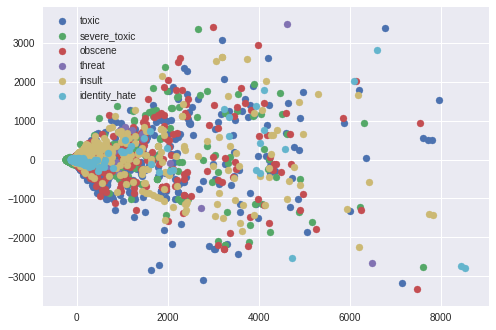

In [0]:
Visual(train, data)# train is (num of rows, 1) and data[num of rows, 6]

In [0]:
# for c in col:
#     print(c)
# # 
# # print(data[data['toxic']==1].index)
# # print(data.iloc[6,:])
# # print(data[data['toxic']==1])
# # l = (data['toxic']==1) * 1
# # print(l)
# # index = data[data['toxic']==1].index
# # print(index.shape)
# # t = train[index,:]
# print(train[data[data['toxic']==1].index])

In [0]:
# # gridsearch
# params = [{'C': [1, 0.1,10,100], 'gamma': [0.001, 0.0001,0.0001,0.00001]}, ]

# def gridSearch(model):
#     msg = "...Started Grid Search=> "  + "    "
#     print(msg,datetime.datetime.now())
#     gridsearch = GridSearchCV(estimator=model, param_grid=params)
    
#     gridsearch.fit(XtrainNew,Ytrain)
#     mean_vals = gridsearch.cv_results_['mean_test_score']
#     stddev_vals = gridsearch.cv_results_['std_test_score']
#     for meanval, stddevval, parameters in zip(mean_vals, stddev_vals, gridsearch.cv_results_['params']):
#         print("%0.2f (+/-%0.02f) for %r" % (meanval, stddevval * 2, parameters))
    
#     valdict = gridsearch.best_params_
    
#     msg = "...End Grid Search=> "  + "    "
#     print(msg,datetime.datetime.now())
#     return valdict

In [0]:
# LR = LogisticRegression()
# bestparameters = gridSearch(LR, )

In [0]:
# for i in range(6):# for sum of each word vector
#     print(col[i])
#     print('roc: '+str(roc_scores[i]))
#     print('precision: '+str(precision_scores[i]))
#     print('recall: '+str(recall_scores[i]))
#     print('\n')

In [0]:
# after word2vec training
# mean factor taken into account
def word2vec_with_mean(dd, testdd):
    arr = []
    for d in dd:
        ar = numpy.zeros((100))
        mean = 1
        for i in d:
            if i in vectors:
                l = vectors[i]
                ar = ar + l
                mean = mean + 1
        ar = ar / mean
        arr.append(ar)
    #print('done')
    
    train = numpy.array(arr)
    #print(train.shape)
    
#     arr1 = []
#     for d in testdd:
#         ar = numpy.zeros((100))
#         mean = 1
#         for i in d:
#             if i in vectors:
#                 l = vectors[i]
#                 mean = mean + 1 
#                 ar = ar + l
#         ar = ar / mean
#         arr1.append(ar)
#     print('done')
    
#     test = numpy.array(arr1)
#     print(test.shape)
    
    
#     roc_scores = []
#     precision_scores = []
#     recall_scores = []
    for c in col:
        print(c)

        crossValidFunc(LR,train,data[c])
#         sc = numpy.mean(cross_val_score(LR,train,data[c],scoring='roc_auc'))
#         print('auc score: '+str(sc))
#         sc1 = numpy.mean(cross_val_score(LR,train,data[c],scoring='precision'))
#         print('precision: '+str(sc1))
#         sc2 = numpy.mean(cross_val_score(LR,train,data[c],scoring='recall'))
#         print('recall: '+str(sc2))
#         print('\n')
#         roc_scores.append(sc)
#         precision_scores.append(sc1)
#         recall_scores.append(sc2)
    
#     return roc_scores, precision_scores, recall_scores, train
    

In [24]:
# Ro, P, Re, train1 = 
word2vec_with_mean(dd,testdd)


toxic
----------------------------------------------------------
train mean accuracy 94.58 +/- 0.03
test mean accuracy 94.57 +/- 0.11
train mean precision 82.23 +/- 0.13
test mean precision 82.13 +/- 0.66
train mean recall 55.41 +/- 0.17
test mean recall 55.44 +/- 0.39
train confusion matrix
[113956   1465   5455   6780]
test confusion matrix
[28486   369  1363  1695]
severe_toxic
----------------------------------------------------------
train mean accuracy 99.04 +/- 0.01
test mean accuracy 99.04 +/- 0.07
train mean precision 54.47 +/- 0.96
test mean precision 54.42 +/- 5.50
train mean recall 25.57 +/- 0.60
test mean recall 25.62 +/- 1.89
train confusion matrix
[126108    272    949    326]
test confusion matrix
[31526    69   237    81]
obscene
----------------------------------------------------------
train mean accuracy 97.03 +/- 0.02
test mean accuracy 97.00 +/- 0.05
train mean precision 82.77 +/- 0.21
test mean precision 82.34 +/- 1.11
train mean recall 55.40 +/- 0.33
test mean r

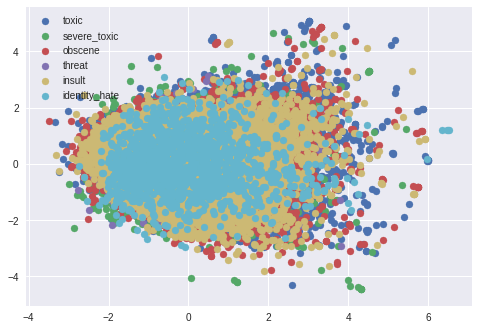

In [0]:
# train1
Visual(train1, data)# train is (num of rows, 1) and data[num of rows, 6]

In [0]:
numpy.savetxt('/content/drive/My Drive/SML/train.txt', train, delimiter=',')
numpy.savetxt('/content/drive/My Drive/SML/train1.txt', train1, delimiter=',')
print('done')
# testdata1.to_csv('/content/drive/My Drive/SML/preprocessed_testdata.csv')#, index=False, header=comment_text)


done
